# Project: Gathering and analyze data of WeRateDogs dataset


### Project done by Caleb Omariba

In [6]:
#importing libraries that will be useful in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from io import BytesIO

## Data Gathering

In [7]:
twits_arc_df=pd.read_csv("twitter-archive-enhanced.csv")

In [8]:
twits_arc_df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [9]:
sample_tweet = twits_arc_df.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [10]:
sample_tweet.text 

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [11]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [12]:
# download the image predictions file using the provided link.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

**Our data has been successifully been downloaded.HTTP status code 200 indicates the request has succeeded**

In [13]:
file_images = url.split('/')[-1]
with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [14]:
# read image predictions file into a DataFrame
predictions_df = pd.read_csv(file_images, sep='\t')
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
predictions_df 

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

**Our predictions_df has been successfully been loaded to a dataframe.**

In [16]:
# check one observation
predictions_df.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

In [17]:
if os.path.isfile('tweet-json.txt'):
    print("The required file is already downloaded into the tweet-json.txt file format.The data will be extracted next")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key =   "YOUR CONSUMER KEY"
    consumer_secret =   "YOUR CONSUMER SECRET"
    access_token =  "YOUR ACCESS TOKEN"
    access_secret =   "YOUR ACCESS SECRET"

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = df.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The required file is already downloaded into the tweet-json.txt file format.The data will be extracted next


In [18]:
#extracting tweets and using the append function to fill them into the tweets_list
tweets= []
for line in open('tweet-json.txt','r'):
    tweets.append(json.loads(line))

In [19]:
#getting a sample tweet from the json file.
tweets[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

In [20]:
#creating a list of data from the provided tweet_json.txt file.
list_of_tweets = []
for json_file in tweets:
    list_of_tweets.append({'tweet_id' : json_file['id'],
                       'retweet_count': int(json_file['retweet_count']),
                       'favorite_count' : int(json_file['favorite_count'])})
   

In [21]:
#creating a Dataframe from the list_of_tweets above.
api_tweets_df = pd.DataFrame(list_of_tweets, columns = ['tweet_id', 'retweet_count' , 'favorite_count']) 
#Checking out if out df from the json was sucessfully created
api_tweets_df.head() 

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

****Our DataFrame has been successfully been created.****

## **Data Assessment**

### 1. Visual  Assessment

In [22]:
twits_arc_df=pd.read_csv("twitter-archive-enhanced.csv")
predictions_df = pd.read_csv(file_images, sep='\t')
api_tweets_df= pd.DataFrame(list_of_tweets, columns = ['tweet_id', 'retweet_count' , 'favorite_count']) 

In [23]:
twits_arc_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

- **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables have a lot of missing data and, moreover, we do not need them for the analysis.**

In [24]:
predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

- **The column names in the predictions_df are not meaningful to be undestood clearly.**
- **The dog breeds names have some names beginning with uppercase letters while others begin with lowercase letters which is not consistent.**

In [25]:
api_tweets_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

### 2.Programmatic Assessment

In [26]:
twits_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- **The time stamp column datatype is wrongly string data type.**
- **we have 2297 tweets with expanded_urls(links to images) meaning 59 tweets have missing data**
- **we have 4 columns for the dog stages which is wrong**

In [27]:
twits_arc_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [28]:
twits_arc_df.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [29]:
twits_arc_df.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [30]:
twits_arc_df.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
839   767191397493538821                    NaN                  NaN   
665   790698755171364864                    NaN                  NaN   
1203  716285507865542656                    NaN                  NaN   
1378  701570477911896070                    NaN                  NaN   
523   809448704142938112                    NaN                  NaN   
1534  689993469801164801                    NaN                  NaN   
1705  680836378243002368                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
869   761745352076779520                    NaN                  NaN   
1618  684969860808454144           6.849598e+17         4.196984e+09   

                      timestamp  \
839   2016-08-21 02:47:37 +0000   
665   2016-10-24 23:37:28 +0000   
1203  2016-04-02 15:25:47 +0000   
1378  2016-02-22 00:53:31 +0000   
523   2016-12-15 17:23:04 +0000   
1534  2016-01-21 02:10:37 +0000   
1705  2015-12-26 19:43:36 +0000   
34    2017-07-13 15:58:47 +0000   
869   2016-08-06 02:06:59 +0000   
1618  2016-01-07 05:28:35 +0000   

                                                 source  \
839   <a href="http://twitter.com/download/iphone" r...   
665   <a href="http://twitter.com/download/iphone" r...   
1203  <a href="http://twitter.com/download/iphone" r...   
1378  <a href="http://twitter.com/download/iphone" r...   
523   <a href="http://twitter.com/download/iphone" r...   
1534  <a href="http://vine.co" rel="nofollow">Vine -...   
1705  <a href="http://twitter.com/download/iphone" r...   
34    <a href="http://twitter.com/download/iphone" r...   
869   <a href="http://twitter.com/download/iphone" r...   
1618  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
839   I don't know any of the backstory behind this ...                  NaN   
665   This is Mosby. He appears to be rather h*ckin ...                  NaN   
1203  This is Stephanus. She stays woke. 12/10 https...                  NaN   
1378  This is Yoda. He's a Zimbabwean Rutabaga. Frea...                  NaN   
523   I call this one "A Blep by the Sea" 12/10 http...                  NaN   
1534  Here we are witnessing a rare High Stepping Al...                  NaN   
1705  This is Ellie. She's secretly ferocious. 12/10...                  NaN   
34    This is Maisey. She fell asleep mid-excavation...                  NaN   
869   Guys.. we only rate dogs. Pls don't send any m...                  NaN   
1618  For those who claim this is a goat, u are wron...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
839                        NaN                        NaN   
665                        NaN                        NaN   
1203                       NaN                        NaN   
1378                       NaN                        NaN   
523                        NaN                        NaN   
1534                       NaN                        NaN   
1705                       NaN                        NaN   
34                         NaN                        NaN   
869                        NaN                        NaN   
1618                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
839   https://twitter.com/dog_rates/status/767191397...                13   
665   https://twitter.com/dog_rates/status/790698755...                12   
1203  https://twitter.com/dog_rates/status/716285507...                12   
1378  https://twitter.com/dog_rates/status/701570477...                 9   
523   https://twitter.com/dog_rates/status/809448704...                12   
1534                      https://vine.co/v/ienexVMZgi5                12   
1705  https://twitter.com/dog_rates/status/680836378...                12   
34    https://twit

In [31]:
sum(twits_arc_df.duplicated())

0

In [32]:
twits_arc_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
twits_arc_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

- **The standard rating_numerators range from 0 to a maximum of 15 the rest of the values are considered as outliers.**

In [34]:
twits_arc_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- **10 is the standard rating_denominator that is used in the WeRateDogs handle. The rest of of the values are incorrect.**

In [35]:
twits_arc_df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

- **we have such names as "a" "the" "an" which are incorrect because they are the 3rd word in the tweets.**
- **"quite"name appears 4 times and begins with a lower case which is not an accurate dog name.**
- **None values are 745 showing that there are missing dog names data.**
- **We can observe that the majority of Dog names start with a capital letter so those that do not are wrong.**

In [36]:
# finding all dog names that are NOT capitalized in the name column.
wrong_dog_names= twits_arc_df.name.str.contains('^[a-z]', regex = True)
twits_arc_df[wrong_dog_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [37]:
#finding the total wrong dog names
len(twits_arc_df[wrong_dog_names])

109

- **109 tweets contain wrong dog names which are invalid names.**

In [38]:
predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [39]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
predictions_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [41]:
predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [43]:
sum(predictions_df.jpg_url.duplicated())

66

- **we have 66 duplicates in the jpg_url column.**

In [44]:
predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [45]:
sum(predictions_df.duplicated())

0

In [46]:
api_tweets_df.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

### **Quality issues observed.**
  `twits_arc_df`
     
  - **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp** variables have a lot of missing data and, moreover, we do not need them for the analysis.
- The **time stamp** column datatype is wrongly string data type.
- The standard **rating_numerators** range from 0 to a maximum of 15 the rest of the values are considered as outliers.
- 10 is the standard **rating_denominator** that is used in the WeRateDogs handle. The rest of of the values are incorrect.
- We can observe that the **majority of Dog names start with a capital letter** so those that do not are wrong.

 `predictions_df`
  
- The **column names in the predictions_df are not meaningful** to be undestood clearly.
- we have **66 duplicates in the jpg_url column**
- The **dog breeds names have some names beginning with uppercase letters while others begin with lowercase letters** which is not consistent.

 ### **Tidiness Issues.**
`twits_arc_df`
- we have **4 columns for the dog stages which is wrong.**

`api_tweets_df`
- *The api_tweets_df table should be combined with the twits_arc_df table.*


# **Cleaning Data**

In [47]:
# creating copies of the DataFrames for cleaning purposes.
twits_arc_df_clean=twits_arc_df.copy()
predictions_df_clean=predictions_df.copy()
api_tweets_df_clean=api_tweets_df.copy()

## **Quality issues handling.**

**`Define`**
1. **Drop all columns with alot od missing data and which will not be helpul in the analyis processing.**

**`Code`**

In [48]:
# use the drop function to remove unhelpful columns
twits_arc_df_clean =twits_arc_df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

 **`Testing`**

In [49]:
twits_arc_df_clean.head(2)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

**`Define`**

2.**Change the timestamp to datetime type data type**

**`Code`**

In [50]:
twits_arc_df_clean['timestamp'] = pd.to_datetime(twits_arc_df_clean['timestamp'])

 **`Testing`**

In [51]:
twits_arc_df_clean.timestamp.dtypes

datetime64[ns, UTC]

**`Define`**

3.**Drop rating_numerator that are >15.**

**`Code`**

In [52]:
twits_arc_df_clean.drop(twits_arc_df_clean[twits_arc_df_clean['rating_numerator'] > 15].index, inplace = True)


 **`Testing`**

In [53]:
twits_arc_df_clean.rating_numerator.max()

15

In [54]:
twits_arc_df_clean.rating_numerator.value_counts().sort_index(ascending = False)

15      2
14     54
13    351
12    558
11    464
10    461
9     158
8     102
7      55
6      32
5      37
4      17
3      19
2       9
1       9
0       2
Name: rating_numerator, dtype: int64

**`Define`**

4.**Deleting the rating_denominator column since it will not be useful because it is a constant that is all the denonimator values are to be  10 though some are not 10.**

**`Code`**

In [55]:
twits_arc_df_clean =twits_arc_df_clean.drop(["rating_denominator",],1)

 **`Testing`**

In [56]:
twits_arc_df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

**`Define`**

5.**Converting the first letterof the dog names to capital for all the god names to make them consistent.**

In [57]:
twits_arc_df_clean['name'].str.islower().sum()

107

**`Code`**

In [58]:
twits_arc_df_clean['name'] = twits_arc_df_clean.name.str.capitalize()

 **`Testing`**

In [59]:
twits_arc_df_clean['name'].str.islower().sum()

0

In [60]:
twits_arc_df_clean['name'].sample(10)

1061    Theodore
772         Huck
722         Earl
2169       Tessa
2116           A
1048        Kilo
665        Mosby
1248        None
289        Sunny
2008        None
Name: name, dtype: object

**`Define`**

6.**Raname the column titles of the predictions_df to meaningful titles.**

**`Code`**

In [61]:
predictions_df_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

 **`Testing`**

In [62]:
predictions_df_clean.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   

  second_prediction  second_confidence  second_dog   third_prediction  \
0            collie           0.156665        True  Shetland_sheepdog   

   third_confidence  third_dog  
0          0.061428       True

In [63]:
predictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_confidence', 'first_dog', 'second_prediction',
       'second_confidence', 'second_dog', 'third_prediction',
       'third_confidence', 'third_dog'],
      dtype='object')

**`Define`**

7.**Drop duplicate values from jpg_url column in the predictions_df.**

**`Code`**

In [64]:
predictions_df_clean =predictions_df_clean.drop_duplicates(subset=['jpg_url'], keep='first')

 **`Testing`**

In [65]:
sum(predictions_df_clean['jpg_url'].duplicated())

0

**`Define`**

8.**Convert all dog names to begin with uppercase letter in the predictions_df.**

**`Code`**

In [66]:
predictions_df_clean['first_prediction'] =predictions_df_clean.first_prediction.str.capitalize()

In [67]:
predictions_df_clean['second_prediction'] = predictions_df_clean.second_prediction.str.capitalize()

In [68]:
predictions_df_clean['third_prediction'] = predictions_df_clean.third_prediction.str.capitalize()

In [69]:
predictions_df_clean.first_prediction.sample(10)

191                    Toy_poodle
1021                          Pug
882                       Samoyed
242                       Peacock
39                  Border_collie
1551                       Bakery
1917                     Pembroke
1193     Chesapeake_bay_retriever
1882    Staffordshire_bullterrier
1820          Rhodesian_ridgeback
Name: first_prediction, dtype: object

In [70]:
predictions_df_clean.first_prediction.value_counts().head(10)

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: first_prediction, dtype: int64

In [71]:
twits_arc_df_clean.head(2)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   

      name doggo floofer pupper puppo  
0  Phineas  None    None   None  None  
1    Tilly  None    None   None  None

## Handling Tidiness issues

**`Define`**

1.**Melting the 4 dog stages in one column.**

**`Code`**

In [72]:
twits_arc_df_clean_store=twits_arc_df_clean[~((twits_arc_df_clean['doggo'] != 'doggo') & (twits_arc_df_clean['floofer'] != 'floofer') & (twits_arc_df_clean['pupper'] != 'pupper') & (twits_arc_df_clean['puppo'] != 'puppo'))].replace('None', np.nan)

In [73]:
twits_arc_df_clean_store= pd.melt(twits_arc_df_clean_store, id_vars = ['tweet_id','timestamp','text','rating_numerator','name'],
                      var_name = 'stages', value_name = 'classifier')

In [74]:
twits_arc_df_clean_store

tweet_id                 timestamp  \
0     890240255349198849 2017-07-26 15:59:51+00:00   
1     889665388333682689 2017-07-25 01:55:32+00:00   
2     889531135344209921 2017-07-24 17:02:04+00:00   
3     886366144734445568 2017-07-15 23:25:31+00:00   
4     884162670584377345 2017-07-09 21:29:42+00:00   
...                  ...                       ...   
1511  672594978741354496 2015-12-04 01:55:13+00:00   
1512  672481316919734272 2015-12-03 18:23:34+00:00   
1513  672254177670729728 2015-12-03 03:21:00+00:00   
1514  672205392827572224 2015-12-03 00:07:09+00:00   
1515  672160042234327040 2015-12-02 21:06:56+00:00   

                                                   text  rating_numerator  \
0     This is Cassie. She is a college pup. Studying...                14   
1     Here's a puppo that seems to be on the fence a...                13   
2     This is Stuart. He's sporting his favorite fan...                13   
3     This is Roscoe. Another pupper fallen victim t...                12   
4     Meet Yogi. He doesn't have any important dog m...                12   
...                                                 ...               ...   
1511  Meet Scott. Just trying to catch his train to ...                 9   
1512  Say hello to Jazz. She should be on the cover ...                12   
1513  This is Rolf. He's having the time of his life...                11   
1514  This is Opal. He's a Royal John Coctostan. Rea...                 9   
1515  This is Bubba. He's a Titted Peebles Aorta. Ev...                 8   

        name stages classifier  
0     Cassie  doggo      doggo  
1        NaN  doggo        NaN  
2     Stuart  doggo        NaN  
3     Roscoe  doggo        NaN  
4       Yogi  doggo      doggo  
...      ...    ...        ...  
1511   Scott  puppo        NaN  
1512    Jazz  puppo        NaN  
1513    Rolf  puppo        NaN  
1514    Opal  puppo        NaN  
1515   Bubba  puppo        NaN  

[1516 rows x 7 columns]

In [75]:
twits_arc_df_clean_store.sample(5)

tweet_id                 timestamp  \
1170  845397057150107648 2017-03-24 22:08:59+00:00   
340   676603393314578432 2015-12-15 03:23:14+00:00   
201   739238157791694849 2016-06-04 23:31:25+00:00   
1403  694329668942569472 2016-02-02 01:21:07+00:00   
1185  831315979191906304 2017-02-14 01:35:49+00:00   

                                                   text  rating_numerator  \
1170  Say hello to Mimosa. She's an emotional suppor...                13   
340   This is Godzilla pupper. He had a ruff childho...                 9   
201   Here's a doggo blowing bubbles. It's downright...                13   
1403  Meet Grady. He's very hungry. Too bad no one c...                 9   
1185  I couldn't make it to the #WKCDogShow BUT I ha...                13   

          name stages classifier  
1170    Mimosa  puppo        NaN  
340   Godzilla  doggo        NaN  
201        NaN  doggo      doggo  
1403     Grady  puppo        NaN  
1185       NaN  puppo        NaN

In [76]:
twits_arc_df_clean_store.dropna(subset=['classifier'], inplace = True)

In [77]:
twits_arc_df_clean_store.sample(4)

tweet_id                 timestamp  \
1096  676819651066732545 2015-12-15 17:42:34+00:00   
887   778039087836069888 2016-09-20 01:12:28+00:00   
1120  673656262056419329 2015-12-07 00:12:23+00:00   
1009  700864154249383937 2016-02-20 02:06:50+00:00   

                                                   text  rating_numerator  \
1096  Watch out Airbud. This pupper is also good at ...                12   
887   Evolution of a pupper yawn featuring Max. 12/1...                12   
1120  This is Albert AKA King Banana Peel. He's a ki...                10   
1009  "Pupper is a present to world. Here is a bow f...                12   

        name  stages classifier  
1096     NaN  pupper     pupper  
887      NaN  pupper     pupper  
1120  Albert  pupper     pupper  
1009       A  pupper     pupper

In [78]:
#Before we merge it with tw_arc get rid of redundent variables in both tables 
twits_arc_df_clean_store.drop(['timestamp','text','rating_numerator', 'name', 'stages'], axis = 1, inplace=True)

In [79]:
twits_arc_df_clean_store.sample(4)

tweet_id classifier
795   837110210464448512     pupper
908   763167063695355904     pupper
1206  819952236453363712      puppo
1134  672254177670729728     pupper

In [80]:
twits_arc_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)

In [81]:
twits_arc_df_clean.sample(5)

tweet_id                 timestamp  \
1261  710153181850935296 2016-03-16 17:18:07+00:00   
1218  714957620017307648 2016-03-29 23:29:14+00:00   
502   813081950185472002 2016-12-25 18:00:17+00:00   
1924  674075285688614912 2015-12-08 03:57:26+00:00   
1244  711743778164514816 2016-03-21 02:38:34+00:00   

                                                   text  rating_numerator  \
1261  This is Lacy. She's tipping her hat to you. Da...                11   
1218  This is Curtis. He's an Albino Haberdasher. Te...                10   
502   This is Baron. He's officially festive as h*ck...                11   
1924  Say hello to Mitch. He thinks that's a hat. No...                11   
1244  Meet Roosevelt. He's calculating the best case...                11   

           name  
1261       Lacy  
1218     Curtis  
502       Baron  
1924      Mitch  
1244  Roosevelt

In [82]:
twits_arc_df_clean= twits_arc_df_clean.merge(twits_arc_df_clean_store, on='tweet_id', how='left')


In [83]:
twits_arc_df_clean.classifier.fillna('not classified', inplace=True)

**`Test`**

In [84]:
twits_arc_df_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
...                  ...                       ...   
2339  666049248165822465 2015-11-16 00:24:50+00:00   
2340  666044226329800704 2015-11-16 00:04:52+00:00   
2341  666033412701032449 2015-11-15 23:21:54+00:00   
2342  666029285002620928 2015-11-15 23:05:30+00:00   
2343  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2339  Here we have a 1949 1st generation vulpix. Enj...                 5   
2340  This is a purebred Piers Morgan. Loves to Netf...                 6   
2341  Here is a very happy pup. Big fan of well-main...                 9   
2342  This is a western brown Mitsubishi terrier. Up...                 7   
2343  Here we have a Japanese Irish Setter. Lost eye...                 8   

          name      classifier  
0      Phineas  not classified  
1        Tilly  not classified  
2       Archie  not classified  
3        Darla  not classified  
4     Franklin  not classified  
...        ...             ...  
2339      None  not classified  
2340         A  not classified  
2341         A  not classified  
2342         A  not classified  
2343      None  not classified  

[2344 rows x 6 columns]

In [85]:
twits_arc_df_clean.classifier.head(15)

0     not classified
1     not classified
2     not classified
3     not classified
4     not classified
5     not classified
6     not classified
7     not classified
8     not classified
9              doggo
10    not classified
11    not classified
12             puppo
13    not classified
14             puppo
Name: classifier, dtype: object

**`Define`**

2.**Merging twits_arc_df and api_tweets_df tables together.**

**`Code`**

In [86]:
twits_arc_df_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

       name      classifier  
0   Phineas  not classified  
1     Tilly  not classified  
2    Archie  not classified  
3     Darla  not classified  
4  Franklin  not classified

In [87]:
api_tweets_df_clean.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [88]:
twits_arc_df_clean = twits_arc_df_clean.merge(api_tweets_df, how='left', left_on='tweet_id', right_on='tweet_id')

In [89]:
twits_arc_df_clean 

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
...                  ...                       ...   
2339  666049248165822465 2015-11-16 00:24:50+00:00   
2340  666044226329800704 2015-11-16 00:04:52+00:00   
2341  666033412701032449 2015-11-15 23:21:54+00:00   
2342  666029285002620928 2015-11-15 23:05:30+00:00   
2343  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2339  Here we have a 1949 1st generation vulpix. Enj...                 5   
2340  This is a purebred Piers Morgan. Loves to Netf...                 6   
2341  Here is a very happy pup. Big fan of well-main...                 9   
2342  This is a western brown Mitsubishi terrier. Up...                 7   
2343  Here we have a Japanese Irish Setter. Lost eye...                 8   

          name      classifier  retweet_count  favorite_count  
0      Phineas  not classified         8853.0         39467.0  
1        Tilly  not classified         6514.0         33819.0  
2       Archie  not classified         4328.0         25461.0  
3        Darla  not classified         8964.0         42908.0  
4     Franklin  not classified         9774.0         41048.0  
...        ...             ...            ...             ...  
2339      None  not classified           41.0           111.0  
2340         A  not classified          147.0           311.0  
2341         A  not classified           47.0           128.0  
2342         A  not classified           48.0           132.0  
2343      None  not classified          532.0          2535.0  

[2344 rows x 8 columns]

In [90]:
predictions_df_clean.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   

  second_prediction  second_confidence  second_dog   third_prediction  \
0            Collie           0.156665        True  Shetland_sheepdog   

   third_confidence  third_dog  
0          0.061428       True

- ### **Merging the `predictions_df_clean table` to the `twits_arc_df_clean` table that already had the `api_tweets_df_clean` merged to form the `final master dataset` from all the 3 sources of data we had from the gathering process.**

In [91]:
#  orming the final clean master dataset from the 3 data sources we had from the gathering process.
twits_arc_df_clean = twits_arc_df_clean.merge(predictions_df_clean,on='tweet_id', how="left")

In [92]:
twits_arc_df_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
...                  ...                       ...   
2339  666049248165822465 2015-11-16 00:24:50+00:00   
2340  666044226329800704 2015-11-16 00:04:52+00:00   
2341  666033412701032449 2015-11-15 23:21:54+00:00   
2342  666029285002620928 2015-11-15 23:05:30+00:00   
2343  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2339  Here we have a 1949 1st generation vulpix. Enj...                 5   
2340  This is a purebred Piers Morgan. Loves to Netf...                 6   
2341  Here is a very happy pup. Big fan of well-main...                 9   
2342  This is a western brown Mitsubishi terrier. Up...                 7   
2343  Here we have a Japanese Irish Setter. Lost eye...                 8   

          name      classifier  retweet_count  favorite_count  \
0      Phineas  not classified         8853.0         39467.0   
1        Tilly  not classified         6514.0         33819.0   
2       Archie  not classified         4328.0         25461.0   
3        Darla  not classified         8964.0         42908.0   
4     Franklin  not classified         9774.0         41048.0   
...        ...             ...            ...             ...   
2339      None  not classified           41.0           111.0   
2340         A  not classified          147.0           311.0   
2341         A  not classified           47.0           128.0   
2342         A  not classified           48.0           132.0   
2343      None  not classified          532.0          2535.0   

                                              jpg_url  img_num  \
0     https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3     https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
...                                               ...      ...   
2339  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2340  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0   
2341  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0   
2342  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0   
2343  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0   

            first_prediction  first_confidence first_dog   second_prediction  \
0                     Orange          0.097049     False               Bagel   
1                  Chihuahua          0.323581      True            Pekinese   
2                  Chihuahua          0.716012      True            Malamute   
3                Paper_towel          0.170278     False  Labrador_retriever   
4                     Basset          0.555712      True    English_springer   
...                      ...               ...       ...                 ...   
2339      Miniature_pinscher          0.560311      True          Rottweiler   
2340     Rhodesian_ridgeback          0.408143      True             Redbone   
2341         German_shepherd          0.596461      True            Malinois   
2342                 Redbone          0.506826      True  Miniature_

- #### **Our clean master dataset has been created successfully ready for analysis and drawing insights.**

In [93]:
twits_arc_df_clean.head(5)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

       name      classifier  retweet_count  favorite_count  \
0   Phineas  not classified         8853.0         39467.0   
1     Tilly  not classified         6514.0         33819.0   
2    Archie  not classified         4328.0         25461.0   
3     Darla  not classified         8964.0         42908.0   
4  Franklin  not classified         9774.0         41048.0   

                                           jpg_url  img_num first_prediction  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0           Orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0        Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0        Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0      Paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0           Basset   

   first_confidence first_dog   second_prediction  second_confidence  \
0          0.097049     False               Bagel           0.085851   
1          0.323581      True            Pekinese           0.090647   
2          0.716012      True            Malamute           0.078253   
3          0.170278     False  Labrador_retriever           0.168086   
4          0.555712      True    English_springer           0.225770   

  second_dog             third_prediction  third_confidence third_dog  
0      False                       Banana          0.076110     False  
1       True                     Papillon          0.068957      True  
2       True                       Kelpie          0.031379      True  
3       True                      Spatula          0.040836     False  
4       True  German_short-haired_pointer          0.175219      True

In [94]:
twits_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2344 non-null   int64              
 1   timestamp          2344 non-null   datetime64[ns, UTC]
 2   text               2344 non-null   object             
 3   rating_numerator   2344 non-null   int64              
 4   name               2344 non-null   object             
 5   classifier         2344 non-null   object             
 6   retweet_count      2342 non-null   float64            
 7   favorite_count     2342 non-null   float64            
 8   jpg_url            2001 non-null   object             
 9   img_num            2001 non-null   float64            
 10  first_prediction   2001 non-null   object             
 11  first_confidence   2001 non-null   float64            
 12  first_dog          2001 non-null   object       

## **Storing and Analyzing the master data set created.**

In [95]:
#Store the clean DataFrame in a CSV file
twits_arc_df_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

In [96]:
df=pd.read_csv('twitter_archive_master.csv')

In [97]:
df

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56+00:00   
1     892177421306343426  2017-08-01 00:17:27+00:00   
2     891815181378084864  2017-07-31 00:18:03+00:00   
3     891689557279858688  2017-07-30 15:58:51+00:00   
4     891327558926688256  2017-07-29 16:00:24+00:00   
...                  ...                        ...   
2339  666049248165822465  2015-11-16 00:24:50+00:00   
2340  666044226329800704  2015-11-16 00:04:52+00:00   
2341  666033412701032449  2015-11-15 23:21:54+00:00   
2342  666029285002620928  2015-11-15 23:05:30+00:00   
2343  666020888022790149  2015-11-15 22:32:08+00:00   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2339  Here we have a 1949 1st generation vulpix. Enj...                 5   
2340  This is a purebred Piers Morgan. Loves to Netf...                 6   
2341  Here is a very happy pup. Big fan of well-main...                 9   
2342  This is a western brown Mitsubishi terrier. Up...                 7   
2343  Here we have a Japanese Irish Setter. Lost eye...                 8   

          name      classifier  retweet_count  favorite_count  \
0      Phineas  not classified         8853.0         39467.0   
1        Tilly  not classified         6514.0         33819.0   
2       Archie  not classified         4328.0         25461.0   
3        Darla  not classified         8964.0         42908.0   
4     Franklin  not classified         9774.0         41048.0   
...        ...             ...            ...             ...   
2339      None  not classified           41.0           111.0   
2340         A  not classified          147.0           311.0   
2341         A  not classified           47.0           128.0   
2342         A  not classified           48.0           132.0   
2343      None  not classified          532.0          2535.0   

                                              jpg_url  img_num  \
0     https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0   
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3     https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
...                                               ...      ...   
2339  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0   
2340  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0   
2341  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0   
2342  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0   
2343  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0   

            first_prediction  first_confidence first_dog   second_prediction  \
0                     Orange          0.097049     False               Bagel   
1                  Chihuahua          0.323581      True            Pekinese   
2                  Chihuahua          0.716012      True            Malamute   
3                Paper_towel          0.170278     False  Labrador_retriever   
4                     Basset          0.555712      True    English_springer   
...                      ...               ...       ...                 ...   
2339      Miniature_pinscher          0.560311      True          Rottweiler   
2340     Rhodesian_ridgeback          0.408143      True             Redbone   
2341         German_shepherd          0.596461      True            Malinois   
2342                 Redbone          0.506826      True

In [98]:
rating_dog_df = df.groupby('first_prediction').count()

In [99]:
rating_dog_df

tweet_id  timestamp  text  rating_numerator  name  \
first_prediction                                                         
Acorn_squash                2          2     2                 2     2   
Afghan_hound                3          3     3                 3     3   
African_crocodile           1          1     1                 1     1   
African_grey                1          1     1                 1     1   
African_hunting_dog         1          1     1                 1     1   
...                       ...        ...   ...               ...   ...   
Wood_rabbit                 3          3     3                 3     3   
Wooden_spoon                1          1     1                 1     1   
Wool                        2          2     2                 2     2   
Yorkshire_terrier           8          8     8                 8     8   
Zebra                       1          1     1                 1     1   

                     classifier  retweet_count  favorite_count  jpg_url  \
first_prediction                                                          
Acorn_squash                  2              2               2        2   
Afghan_hound                  3              3               3        3   
African_crocodile             1              1               1        1   
African_grey                  1              1               1        1   
African_hunting_dog           1              1               1        1   
...                         ...            ...             ...      ...   
Wood_rabbit                   3              3               3        3   
Wooden_spoon                  1              1               1        1   
Wool                          2              2               2        2   
Yorkshire_terrier             8              8               8        8   
Zebra                         1              1               1        1   

                     img_num  first_confidence  first_dog  second_prediction  \
first_prediction                                                               
Acorn_squash               2                 2          2                  2   
Afghan_hound               3                 3          3                  3   
African_crocodile          1                 1          1                  1   
African_grey               1                 1          1                  1   
African_hunting_dog        1                 1          1                  1   
...                      ...               ...        ...                ...   
Wood_rabbit                3                 3          3                  3   
Wooden_spoon               1                 1          1                  1   
Wool                       2                 2          2                  2   
Yorkshire_terrier          8                 8          8                  8   
Zebra                      1                 1          1                  1   

                     second_confidence  second_dog  third_prediction  \
first_prediction                                                       
Acorn_squash                         2           2                 2   
Afghan_hound                         3           3                 3   
African_crocodile                    1           1                 1   
African_grey                         1           1                 1   
African_hunting_dog                  1           1                 1   
...                                ...         ...               ...   
Wood_rabbit                          3           3                 3   
Wooden_spoon                         1           1                 1   
Wool                                 2           2                 2   
Yorkshire_terrier                    8           8                 8   
Zebra                                1           1                 1   

                     third_confidence  third_dog  
first_prediction                                  
Ac

In [100]:
goldendog_retriever_df = df.query('first_prediction == "Golden_retriever"')

In [101]:
goldendog_retriever_df 

tweet_id                  timestamp  \
14    889531135344209921  2017-07-24 17:02:04+00:00   
16    888917238123831296  2017-07-23 00:22:39+00:00   
17    888804989199671297  2017-07-22 16:56:37+00:00   
45    883482846933004288  2017-07-08 00:28:19+00:00   
47    883117836046086144  2017-07-07 00:17:54+00:00   
...                  ...                        ...   
2274  667182792070062081  2015-11-19 03:29:07+00:00   
2280  667160273090932737  2015-11-19 01:59:39+00:00   
2289  667044094246576128  2015-11-18 18:17:59+00:00   
2320  666345417576210432  2015-11-16 20:01:42+00:00   
2333  666063827256086533  2015-11-16 01:22:45+00:00   

                                                   text  rating_numerator  \
14    This is Stuart. He's sporting his favorite fan...                13   
16    This is Jim. He found a fren. Taught him how t...                12   
17    This is Zeke. He has a new stick. Very proud o...                13   
45    This is Bella. She hopes her smile made you sm...                 5   
47    Please only send dogs. We don't rate mechanics...                13   
...                                                 ...               ...   
2274  This is Timison. He just told an awful joke bu...                10   
2280  This is Bradlay. He is a Ronaldinho Matsuyama ...                11   
2289            12/10 gimme now https://t.co/QZAnwgnOMB                12   
2320  Look at this jokester thinking seat belt laws ...                10   
2333  This is the happiest dog you will ever see. Ve...                10   

         name      classifier  retweet_count  favorite_count  \
14     Stuart           puppo         2321.0         15359.0   
16        Jim  not classified         4709.0         29611.0   
17       Zeke  not classified         4559.0         26080.0   
45      Bella  not classified        10407.0         46860.0   
47       None  not classified         6949.0         37914.0   
...       ...             ...            ...             ...   
2274  Timison  not classified         6618.0         15075.0   
2280  Bradlay  not classified           66.0           268.0   
2289     None  not classified           54.0           198.0   
2320     None  not classified          146.0           307.0   
2333      The  not classified          232.0           496.0   

                                              jpg_url  img_num  \
14    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg      1.0   
16    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg      1.0   
17    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg      1.0   
45    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg      1.0   
47    https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg      2.0   
...                                               ...      ...   
2274  https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg      1.0   
2280  https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg      1.0   
2289  https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg      1.0   
2320  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg      1.0   
2333  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg      1.0   

      first_prediction  first_confidence first_dog         second_prediction  \
14    Golden_retriever          0.953442      True        Labrador_retriever   
16    Golden_retriever          0.714719      True           Tibetan_mastiff   
17    Golden_retriever          0.469760      True        Labrador_retriever   
45    Golden_retriever          0.943082      True        Labrador_retriever   
47    Golden_retriever          0.949562      True        Labrador_retriever   
...                ...               ...       ...                       ...   
2274  Golden_retriever          0.949892      True              Irish_setter   
2280  Golden_retriever          0.471351      True          Miniature_poodle   
2289  Golden_retriever          0.765266      True        Labrador_retriever   
2320  Golden_retriever          0.858744      True  Chesapeake_bay_r

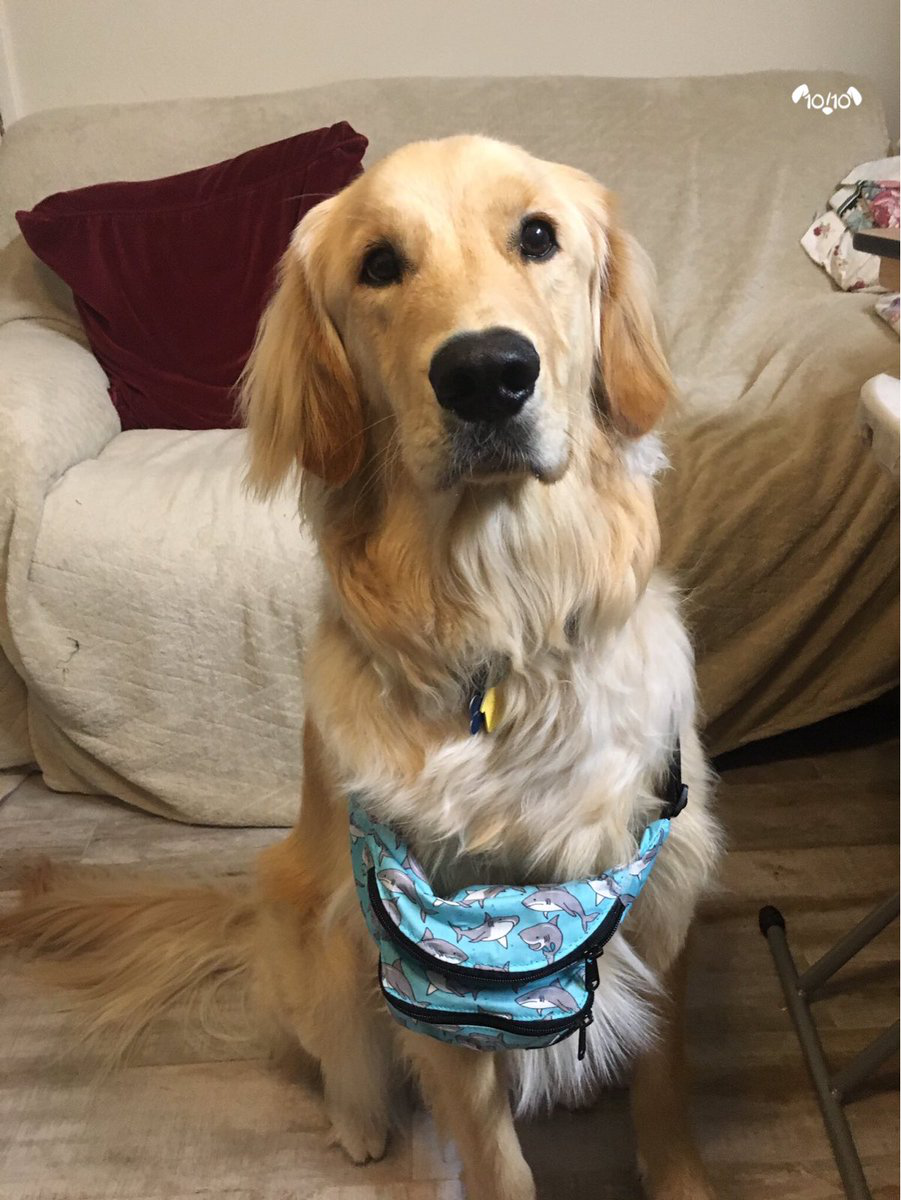

In [102]:
# checking of the images predicted were actually dogs.
url = goldendog_retriever_df.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

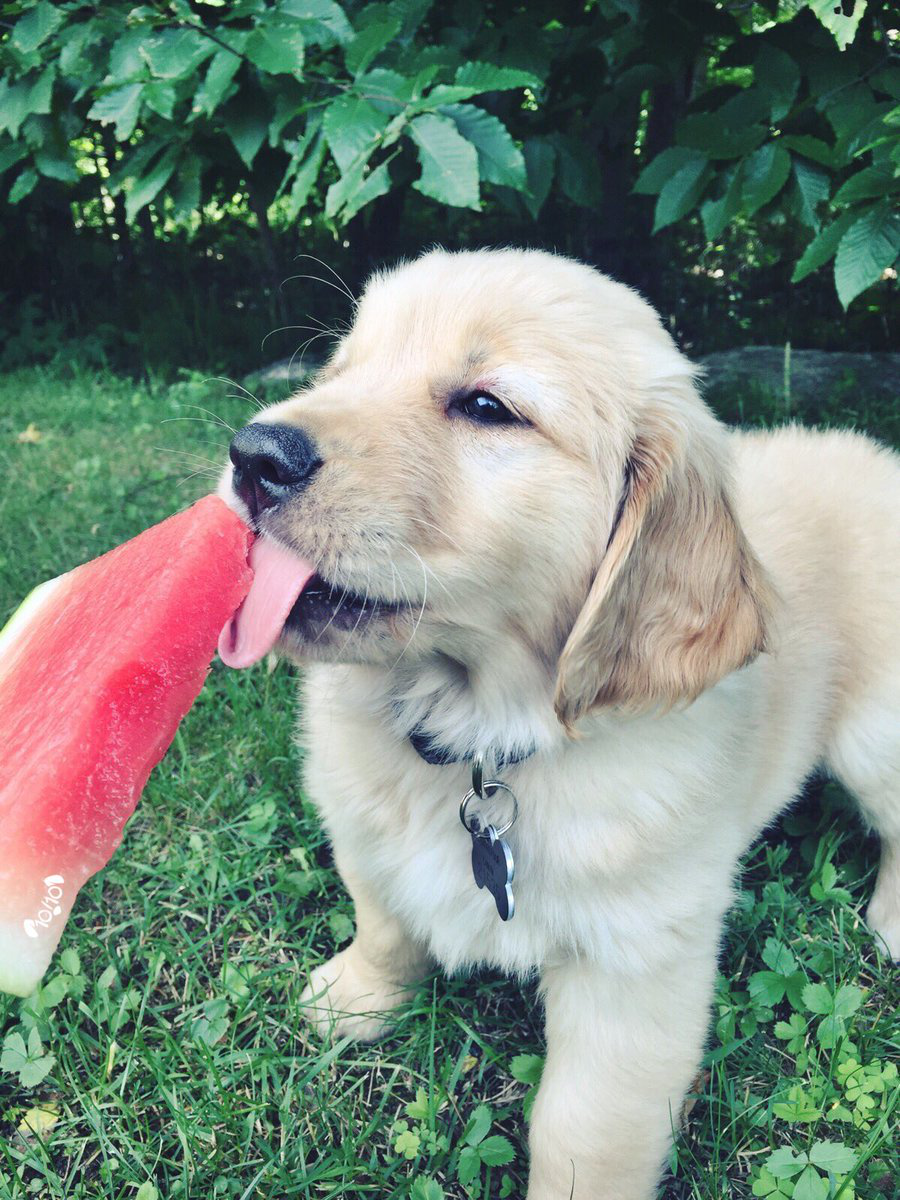

In [103]:
url = goldendog_retriever_df.jpg_url.iloc[5]
r = requests.get(url)
Image.open(BytesIO(r.content))

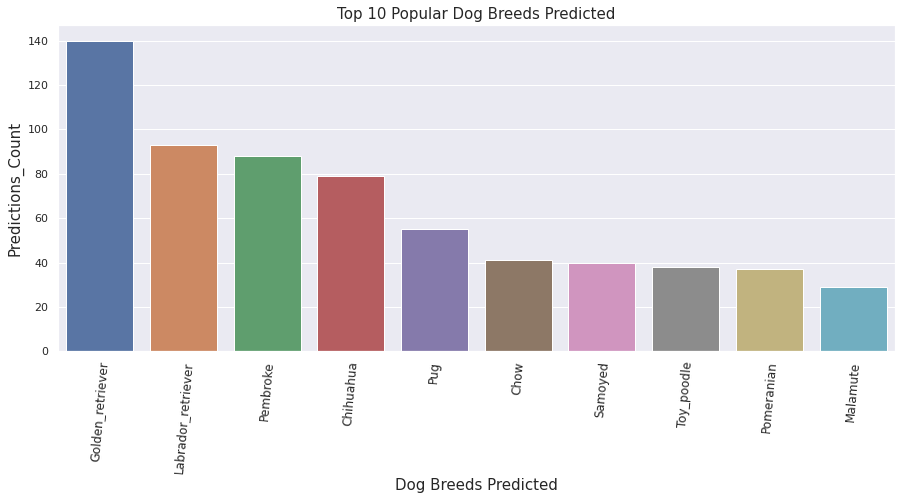

In [104]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = df['first_prediction'].value_counts()[0:10].index,
            y =df['first_prediction'].value_counts()[0:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 85, fontsize = 12);
plt.xlabel("Dog Breeds Predicted",fontsize = 15);
plt.ylabel("Predictions_Count",fontsize = 15);
plt.title("Top 10 Popular Dog Breeds Predicted",fontsize = 15);

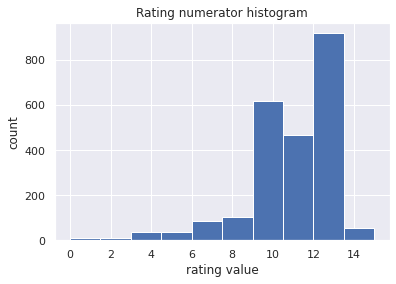

In [105]:
#plotting a histogram to see the distribution of the rating numerator.
fig, ax = plt.subplots()
plt.hist(df.rating_numerator);
plt.title('Rating numerator histogram');
ax.set_ylabel('count');
ax.set_xlabel('rating value');

- **Most dogs had been rated by the `value of 13`.**

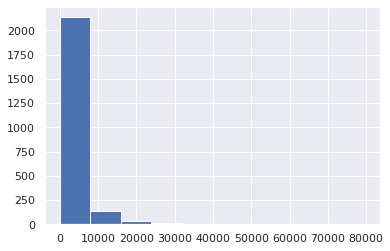

In [106]:
# plotting an histogram to check the distribution of the retweets.
plt.hist(df.retweet_count);

-**The retweets count is skewed to the left.**

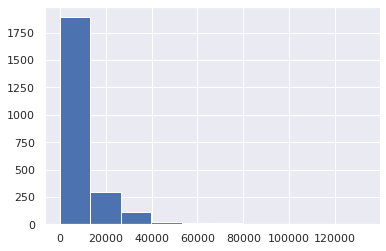

In [107]:
#plotting hist to check the distribution of the favorite_count.
plt.hist(df.favorite_count);

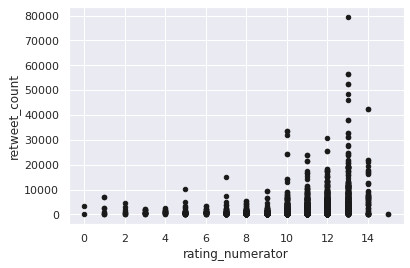

In [108]:
#checking the relationship between 'rating_numerator' and 'retweet_count'

df.plot(x='rating_numerator',y='retweet_count',kind='scatter',color='k');

- **The ratings by WeRateDogs are pretty relative to the retweet count and favorite count.**


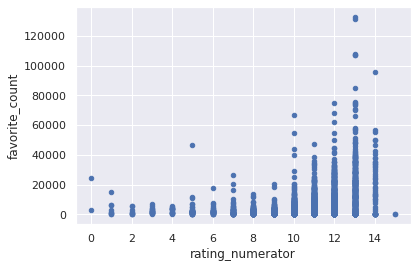

In [109]:
#Let's look at the relationship between 'rating_numerator' and 'favorite count'
df.plot(x='rating_numerator',y='favorite_count',kind='scatter',color='b');

-**They are relative,too, and I also found that rating_numerator 13 got the highest favorite counts and retweet counts.**

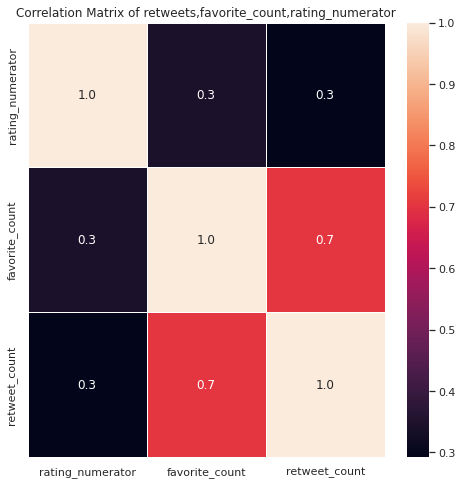

In [110]:
#Plotting correlation plot for Retweet_Count, Favorite_Count and Ratings_numerator to check relationships
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix of retweets,favorite_count,rating_numerator');

- **There is a relatively strong correlation of 0.7 between retweet_count and favorite_count.**

<Figure size 1440x1440 with 0 Axes>

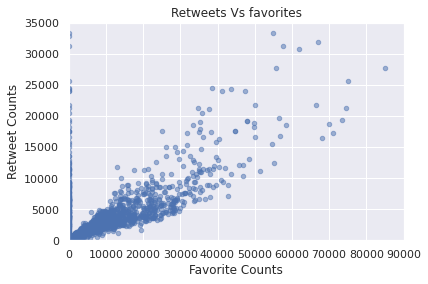

In [111]:
# plotting favorite_count and retweet_count
plt.figure(figsize=(20,20))
color = ['lightcoral', 'darkorange']
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5,color='b')
plt.xlim((0,90000))
plt.ylim((0,35000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Retweets Vs favorites');

- **Plotting favorite_count and retweet_count shows positive linear relationship.**